In [1]:
from math import sin, cos, log, sqrt
import numpy
from matplotlib import pyplot

from matplotlib import animation
from IPython.display import HTML

### Calculations

In [2]:
T = 3600*24*30 #(seconde) # soit 30 jours > 27,3 jours # final time
dt = 1                # set time-increment 

# CHANGER LA VALEUR DE dt VERS 1 !!!

N = int(T/dt)+1         # number of time-steps
M = 20000 # int(14*24*3600 / dt) + 1 # number of time-steps for asteroid
donnees_L = numpy.empty((N,4))
donnees_A = numpy.empty((M,4))

Donnnées du problème

In [3]:
# model parametres
m_T = 5.972*10**24
m_L = 7.348*10**22
# e = 0.0549006
r_min = 362600*10**3
G = 6.67408*10**(-11)
# r = 384400*10**3 distance Terre-Lune
h = dt # = 1. le pas 

# initial conditions
t_0 = 0
v_x0 = 0
v_y0 = 1083.434974
x_0 = -r_min 
y_0 = 0
donnees_L[0] = numpy.array([x_0 , y_0 , v_x0 , v_y0])

Résoudre les équations du mouvement: 

Soient

$\mathrm{\mathbf{u}}= 
\begin{pmatrix}x\\ 
y\\ 
v_x\\
v_y\\
\end{pmatrix}$

et 

$\mathrm{\mathbf{u'}}= 
\begin{pmatrix}x'\\ 
y'\\ 
v_x'\\
v_y'\\
\end{pmatrix}$




\begin{equation} 
\mu\dfrac{d^{2}\mathbf{r}}{dt^{2}}= \dfrac{-Gm_Tm_L\mathbf{r}}{r^{3}}
\end{equation}

En posant: \begin{equation}
\mu = \dfrac{m_Tm_L}{m_T+m_L}
\end{equation}


\begin{equation} 
\dfrac{d^{2}\mathbf{r}}{dt^{2}}= \dfrac{-Gm_Tm_L\mathbf{r}}{r^{3}\mu}
\end{equation}

De plus, 

\begin{equation}
\mathbf{r}= (-r\cos\theta, r\sin\theta)
\end{equation}

Donc on trouve les accélérations en x et en y : 

\begin{equation}
\ddot x\mathbf = \dfrac{-G\left(m_T+m_L\right)r\cos\theta}{r^{3}}
\end{equation}

\begin{equation}
\ddot y\mathbf = \dfrac{-G\left(m_T+m_L\right)r\sin\theta}{r^{3}} 
\end{equation}

Donc :


$\mathrm{f}(\mathbf{u}) = \begin{pmatrix}v_x\\ 
v_y\\ 
\dfrac{-G\left(m_T+m_L\right)r\cos\theta}{r^{3}}\\ 
\dfrac{-G\left(m_T+m_L\right)r\sin\theta}{r^{3}}\\
\end{pmatrix} $

Nous trouvons que : 
 
$\mathrm{f}(\mathbf{u}) = \begin{pmatrix}v_x\\ 
v_y\\
\dfrac{-G\left(m_T+m_L\right)x}{\left(x^{2}+y^{2}\right)^{\dfrac{3}{2}}}\\ 
\dfrac{-G\left(m_T+m_L\right)y}{\left(x^{2}+y^{2}\right)^{\dfrac{3}{2}}}\\
\end{pmatrix}$





 
 
 






In [4]:
def f(ut): 
    return numpy.array([ut[2],ut[3],-G*(m_T+m_L)*ut[0]/(ut[0]**2+ut[1]**2)**(3/2),\
                     -G*(m_T+m_L)*ut[1]/(ut[0]**2+ut[1]**2)**(3/2)]) 


Implémentation de la méthode de RK4 pour résoudre l'équation différentielle $\mathbf{u'}= f\left(\mathbf{u}\right)$

In [5]:
def rk4_step(ut,f,dt):   
    k_1 = f(ut)
    k_2 = f(ut + dt/2 * k_1)
    k_3 = f(ut + dt/2 * k_2)
    k_4 = f(ut + dt * k_3)    
    return ut + dt/6*(k_1 + 2*k_2 + 2*k_3 + k_4)

Créer une boucle for qui va former tous les points de l'ellipse

In [6]:
for t in range(1,N):
    donnees_L[t] = rk4_step(donnees_L[t-1],f,dt)

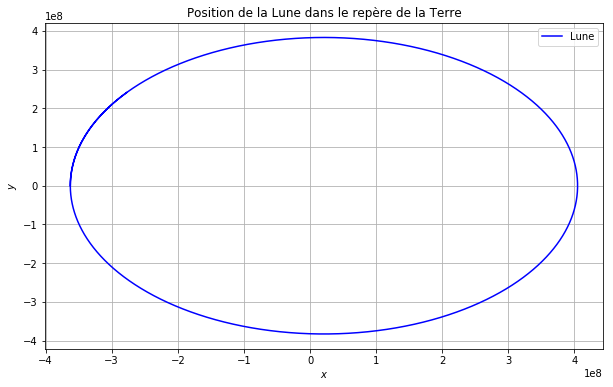

In [7]:
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(donnees_L[:,0],donnees_L[:,1], 'b-', label='Lune')
pyplot.title('Position de la Lune dans le repère de la Terre')
pyplot.legend();
pyplot.show();

Calculs pour trouver l'excentricité, le demi-grand axe et le demi-petit axe

In [8]:
def find_abe(donnees_L):
    parametres = numpy.zeros(3)
    parametres[0] = 1/2*(numpy.max(donnees_L[:,0])-numpy.min(donnees_L[:,0]))
    parametres[1] = 1/2*(numpy.max(donnees_L[:,1])-numpy.min(donnees_L[:,1]))
    a = parametres[0]
    b = parametres[1]
    parametres[2] = numpy.sqrt(1-b**2/a**2)
    return parametres

In [9]:
parametres = find_abe(donnees_L)
parametres

array([  3.83663116e+08,   3.83084497e+08,   5.49000296e-02])

On définit la fonction find_period qui va déterminer la période T; dès qu'on a un minimum local; alors on demande au terminal de renvoyer l'indice i. 

In [10]:
def find_period(donnees_L,dt):
    for i in range(1,N-1):
        if (donnees_L[i,0] < donnees_L[i-1,0] and donnees_L[i,0] < donnees_L[i+1,0]):
            Nnum = i
    Tnum = dt * Nnum
    return Tnum
# i=0
# Tnum = 0
# while (Tnum != 0) :
#    i=i+1
#    if (donnees_L[i,0] < donnees_L[i-1,0] and donnees_L[i,0] < donnees_L[i+1,0]):
#           Nnum = i
#    Tnum = dt * Nnum

In [11]:
find_period(donnees_L,dt)

2350682

In [12]:
27.3 * 24 * 3600

2358720.0

In [13]:
apogee_L = numpy.max(abs(donnees_L[:,0]))

for i in range(1,N):
    if (donnees_L[i,0]>=apogee_L):
        indice_apogee = i
        break
donnees_L[indice_apogee]

array([  4.04726233e+08,  -9.61143367e+01,  -2.43903597e-04,
        -9.70664834e+02])

Calculons l'ordre de convergence (pour la trajectoire de la Lune). 

In [14]:
def get_diffgrid(u_current, u_fine, dtprim):
    # On calcule la moyenne L^1 de la distance L^1 entre la position de Lune
    # obtenue avec un pas de dtprim et la position "idéale" obtenue pour dt=dtfine.
    
    # Parameters
    # ----------
    # u_current : array of float
    #   solution on the current grid.
    # u_finest : array of float
    #   solution on the fine grid.
    # dt : float
    #     time-increment on the current grid.
    
    # Returns
    # -------
    # diffgrid : float
    #     difference computed in the L-1 norm.
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = int(numpy.ceil(N_fine/N_current))
    
    diffgrid = dtprim * numpy.sum( numpy.abs( u_current[:,0] - u_fine[::grid_size_ratio,0]) + numpy.abs( u_current[:,1] - u_fine[::grid_size_ratio,1]) )
               # dtprim *  numpy.sum(numpy.sqrt (u_current[:,0] - u_fine[::grid_size_ratio,0])*(u_current[:,0] - u_fine[::grid_size_ratio,0])+ (u_current[:,1] - u_fine[::grid_size_ratio,1])*(u_current[:,1] - u_fine[::grid_size_ratio,1])) 
    return diffgrid

In [15]:
def ordre_convergence(r,h): # r > 1 est le ratio et h le plus petit pas considéré
    dt_values = numpy.array([h, r * h, r**2 * h]) #, r**3 * h, r**4 * h, r**5 * h]) # numpy.array([h, r*h, r**2*h]) 
    u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

    for i, dtprim in enumerate(dt_values):
    
        Nprim = int(T/dtprim)+1    # number of time-steps
    
        ### discretize the time t ###
        t = numpy.linspace(0.0, T, Nprim)
    
        # initialize the array containing the solution for each time-step
        u = numpy.empty((Nprim, 4))
        u[0] = numpy.array([x_0, y_0, v_x0, v_y0])

        # time loop
        for n in range(Nprim-1):
            ### call rk4_step() ###
            u[n+1] = rk4_step(u[n], f, dtprim)
    
        # store the value of u related to one grid
        u_values[i] = u
    
    # calculate the order of convergence
    error1 = get_diffgrid(u_values[1], u_values[0], dt_values[1])
    error2 = get_diffgrid(u_values[2], u_values[1], dt_values[2])
    alpha = ( log(error2) - log(error1) ) / log(r)
    return alpha

#error3 = get_diffgrid(u_values[3], u_values[2], dt_values[3])
#error4 = get_diffgrid(u_values[4], u_values[3], dt_values[4])
#error5 = get_diffgrid(u_values[5], u_values[4], dt_values[5])
#alpha1 = ( log(error2) - log(error1) ) / log(r)
#print('La valeur de l ordre de convergence calculé avec dt = 1,2,8 est') #1,10,100 est')
#print(alpha1)
#print()
#alpha2 = ( log(error3) - log(error2) ) / log(r)
#print('La valeur de l ordre de convergence calculé avec dt = 10,100,1000 est')
#print(alpha2)
#print()
#alpha3 = ( log(error4) - log(error3) ) / log(r)
#print('La valeur de l ordre de convergence calculé avec dt = 100,1000,10000 est')
#print(alpha3)
#alpha4 = ( log(error5) - log(error4) ) / log(r)
#print()
#print('La valeur de l ordre de convergence calculé avec dt = 1000,10000,100000 est')
#print(alpha4)

In [16]:
ordre_convergence(2,1)

-0.25544328328889027

In [17]:
ordre_convergence(2,1000)

4.032390860942306

In [18]:
ordre_convergence(2,100)

0.9613993435118824

Au moment du passage de la lune à l'appogée de sa trajectoire, un astéroïde traverse le centre de l'ellipse avec une vitesse $\mathbf{v}= \begin{pmatrix}500\\-500\\
\end{pmatrix}$
Modifier votre code numérique pour calculer la position de cet astéroïde après 14 jours. On suppose que l'astéroïde est dévié par le systeme Terre-Lune mais que celui-ci est trop léger pour modifier la trajectoire de la terre ou de la lune.


Calculons l'accélération de l'astéroïde 

$
\ddot{\mathbf{r}}_A = \dfrac{\mathbf{F_{AT}}}{m_A} + \dfrac{\mathbf{F_{AL}}}{m_A}
$

Nous introduisons la notion de distance relative de l'astéroïde sur la planète Terre:  

$\ddot{\mathbf{r}}_{AT} = \ddot{\mathbf{r}}_A - \ddot{\mathbf{r}}_T$

c'est-à-dire 

$\ddot{\mathbf{r}}_{AT} = \dfrac{\mathbf{F_{AT}}}{m_A} - \dfrac{\mathbf{F_{AT}}}{m_T} - \dfrac{\mathbf{F_{TL}}}{m_T} + 
\dfrac{\mathbf{F_{AL}}}{m_A}$

In [19]:
def g(st, ut): #st est la position-vitesse de l'asteroide au temps t, ut celle de la Lune.
    
    x_A = st[0]
    y_A = st[1]
    vx_A = st[2]
    vy_A = st[3]
    
    x_L = ut[0]
    y_L = ut[1]
    vx_L = ut[2]
    vy_L = ut[3]
    
    accx_A = -G * ( m_T * st[0] / (st[0]**2+st[1]**2)**(3/2) + m_L * (st[0]-ut[0]) / ((st[0]-ut[0])**2 + (st[1]-ut[1])**2)**(3/2) ) 
    accy_A = -G * ( m_T * st[1] / (st[0]**2+st[1]**2)**(3/2) + m_L * (st[1]-ut[1]) / ((st[0]-ut[0])**2 + (st[1]-ut[1])**2)**(3/2) )
    
    #aussi calculer pour la Lune.
    accx_L = -G*(m_T+m_L)*ut[0]/(ut[0]**2+ut[1]**2)**(3/2) 
    accy_L = -G*(m_T+m_L)*ut[1]/(ut[0]**2+ut[1]**2)**(3/2)
                   
    st_temporaire = [vx_A, vy_A, accx_A, accy_A]
    ut_temporaire = [vx_L, vy_L, accx_L, accy_L]
    #temporaire[0] pour l'ast' et temporaire[1] pour la Lune
    
    return numpy.array([vx_A, vy_A, accx_A, accy_A])

In [20]:
def rk4_step_bis(st, ut, g ,dt):
    k_1 = g(st,ut)
    k_2 = g(st + dt/2 * k_1 , ut + dt/2*k_1)
    k_3 = g(st + dt/2 * k_2 , ut + dt/2*k_2 ) 
    k_4 = g(st + dt * k_3, ut + dt*k_3 )
    return st + dt/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)

In [21]:
donnees_A[0] = numpy.array([ parametres[0] - r_min , 0 , -500 , 500 ])

In [22]:
for t in range(1,M):
    donnees_A[t] = rk4_step_bis(donnees_A[t-1],donnees_L[t-1],g,dt)

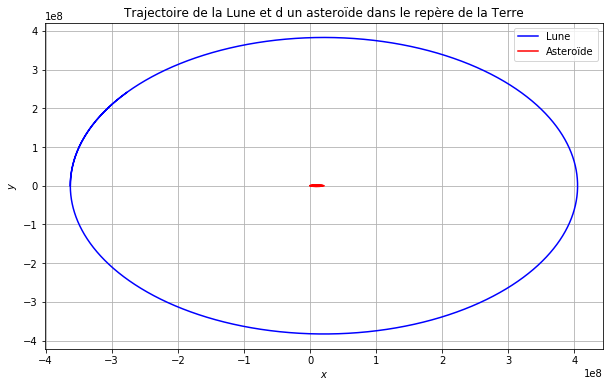

In [23]:
pyplot.figure(figsize=(10,6))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(donnees_L[:,0],donnees_L[:,1], 'b-', label='Lune')
pyplot.plot(donnees_A[:,0],donnees_A[:,1], 'r-', label='Asteroïde')
pyplot.title('Trajectoire de la Lune et d un asteroïde dans le repère de la Terre')
pyplot.legend();
pyplot.show();

Maintenant, on va essayer péniblement de faire une animation.

In [24]:
fig = pyplot.figure(figsize=(10,10))
ax = pyplot.axes(xlim=(-5*10**8,5*10**8), ylim=(-5*10**8,5*10**8))
line_L = ax.plot([], [], color='b', ls='-', lw=3, label='Lune')[0]
line_A = ax.plot([], [], color='r', ls='-', lw=3, label='Asteroïde')[0]

In [25]:
def animate(i):
    line_L.set_data(donnees_L[:i,0],donnees_L[:i,1])
    line_A.set_data(donnees_A[:i,0],donnees_A[:i,1])
    return line_L,line_A

In [26]:
anim = animation.FuncAnimation(fig, animate,
                               frames=10000, interval=100) #Pour dt=1, 

In [27]:
HTML(anim.to_html5_video())